## Описание проекта:

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import numpy as np
import math

In [2]:
df_calls = pd.read_csv('/datasets/calls.csv')
df_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [3]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


В таблице df_calls 4 столбца. В таблице содержится 2 столбца строчного типа, 1 столбец целочисленного типа и 1 столбец вещественного типа. В данной таблице пропущенных значений нет.

In [4]:
df_internet = pd.read_csv('/datasets/internet.csv')
df_internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [5]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


В таблице df_internet 5 столбцов. В таблице содержится 2 столбца строчного типа, 2 столбца целочисленного типа и 1 столбец вещественного типа. В данной таблице пропущенных значений нет.

In [6]:
df_messages = pd.read_csv('/datasets/messages.csv')
df_messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [7]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


В таблице df_messages 3 столбца. В таблице содержится 2 столбца строчного типа и 1 столбец целочисленного типа. В данной таблице пропущенных значений нет.

In [8]:
df_tariffs = pd.read_csv('/datasets/tariffs.csv')
df_tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [9]:
df_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


В таблице df_tariffs 8 столбцов. В таблице содержится 1 столбец строчного типа и 7 столбцов целочисленного типа. В данной таблице пропущенных значений нет.

In [10]:
df_users = pd.read_csv('/datasets/users.csv')
df_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [11]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


В таблице df_users 8 столбцов. В таблице содержится 6 столбцов строчного типа и 2 столбца целочисленного типа. В данной таблице, в столбце churn_date, присутствуют пропущенные значения.

## Шаг 2. Подготовьте данные

Приведем столбец call_date, таблицы df_calls, к типу "datetime64":

In [12]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')

Компания «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута. Округлим значения столбца duration, таблицы df_calls, до верхних значений:

In [13]:
df_calls.duration = [math.ceil(i) for i in df_calls.duration]

Посчитаем, какой процент занимают ячейки столбца со значением 0:

In [14]:
df_calls.query('duration == 0').duration.count() / len(df_calls) * 100

19.551644316336553

Ячейки со значением 0 занимают 19.5%. Пропущенные значения могут быть пропущенными звонками. Удалим данные значения, чтобы они не участвовали в расчете среднего значения за месяц и не исказили его.

In [15]:
df_calls = df_calls.query('duration != 0')

======================================================================================================================

Приведем столбец session_date, таблицы df_internet, к типу "datetime64":

In [16]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')

Переведем мегабайты в гигабайты:

In [17]:
df_internet.mb_used = df_internet.mb_used / 1024

Округлим значения столбца mb_used, таблицы df_internet, до верхних значений:

In [18]:
df_internet.mb_used = [math.ceil(i) for i in df_internet.mb_used]

Посчитаем, какой процент занимают ячейки столбца со значением 0:

In [19]:
df_internet.query('mb_used == 0').mb_used.count() / len(df_internet) * 100

13.118155773916303

Ячейки со значением 0 занимают 13.1%. Возможная причина пропусков в том, что это пропущенные звонки через месенджеры. Так же, как и в таблице df_calls, удалим значения равные нулю.

In [20]:
df_internet = df_internet.query('mb_used != 0')

======================================================================================================================

Приведем столбец message_date, таблицы df_messages, к типу "datetime64":

In [21]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')

======================================================================================================================

В столбце churn_date, таблицы df_users, пустым ячейкам присвоим значение 0 (так как в ячейках типа "datetime64", число 0 преобразуется в 01.01.1970, будем считать это значение заполнителем пустых значений):

In [22]:
df_users.loc[df_users['churn_date'].isna(), 'churn_date'] = df_users.fillna(0)

Приведем столбцы churn_date и reg_date, таблицы df_users, к типу "datetime64":

In [23]:
for i in ['churn_date', 'reg_date']:
    df_users[i] = pd.to_datetime(df_users[i], format='%Y-%m-%d')

======================================================================================================================

Посчитаем для каждого пользователя: количество сделанных звонков и израсходованных минут разговора по месяцам.

In [24]:
df_calls['month'] = df_calls['call_date'].dt.month

In [25]:
calls = df_calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['count', 'sum'])

In [26]:
calls.columns = ['calls_count', 'calls_sum']

In [27]:
calls

calls_count  calls_sum
user_id month                        
1000    5               17        159
        6               28        172
        7               41        340
        8               42        408
        9               46        466
...                    ...        ...
1498    10              30        247
1499    9                8         70
        10              44        449
        11              62        612
        12              56        492

[3168 rows x 2 columns]

======================================================================================================================

Посчитаем для каждого пользователя: количество отправленных сообщений по месяцам.

In [28]:
df_messages['month'] = df_messages['message_date'].dt.month

In [29]:
messages = df_messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count')

In [30]:
messages.columns = ['messages_count']

In [31]:
messages

messages_count
user_id month                
1000    5                  22
        6                  60
        7                  75
        8                  81
        9                  57
...                       ...
1498    10                 42
1499    9                  11
        10                 48
        11                 59
        12                 66

[2717 rows x 1 columns]

======================================================================================================================

Посчитаем для каждого пользователя: объем израсходованного интернет-трафика по месяцам.

In [32]:
df_internet['month'] = df_internet['session_date'].dt.month

In [33]:
internet = df_internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum')

In [34]:
internet.columns = ['internet_sum']

In [35]:
internet

internet_sum
user_id month              
1000    5                 4
        6                49
        7                28
        8                27
        9                26
...                     ...
1498    10               50
1499    9                 5
        10               44
        11               41
        12               40

[3201 rows x 1 columns]

======================================================================================================================

Возьмем из таблицы df_calls столбцы user_id и month, сохраним их в переменную df:

In [36]:
df = df_calls[['user_id', 'month']]

Удалим все повторяющиеся значений из таблицы df:

In [37]:
df = df.drop_duplicates()

Добавим к таблице pivot_table столбцы таблиц calls, messages и internet. Объединим столбцы по совпадающим строкам столбцов month и user_id. Объединим столбцы по внешней области, чтобы все значения таблиц попали в общую таблицу:

In [38]:
for i in [calls, messages, internet]:
    df = df.merge(i, on=['month', 'user_id'], how='outer')

In [39]:
df

,user_id,month,calls_count,calls_sum,messages_count,internet_sum
0,1000,6,28.0,172.0,60.0,49.0
1,1000,9,46.0,466.0,57.0,26.0
2,1000,12,38.0,333.0,70.0,19.0
3,1000,8,42.0,408.0,81.0,27.0
4,1000,5,17.0,159.0,22.0,4.0
...,...,...,...,...,...,...
3209,1489,10,NaN,NaN,21.0,52.0
3210,1489,11,NaN,NaN,20.0,46.0
3211,1489,12,NaN,NaN,35.0,45.0
3212,1240,2,NaN,NaN,NaN,3.0


После объединения, у нас в таблице появились пропущенные значения. Это означает, что пользователь пользуется одной услугой и не пользуется другой. Исправим пропущенные значения на ноль:

In [40]:
df = df.fillna(0)

Составим таблицу с названиями тарифов и сохраним в переменную tariffs:

In [41]:
tariffs = df_users[['user_id', 'tariff']]

Добавим к таблице df таблицу tariffs:

In [42]:
df = df.merge(tariffs, on='user_id')

Изменим тип данных в столбцах calls_count, calls_sum, messages_count и internet_sum на int64:

In [43]:
for i in ['calls_count', 'calls_sum', 'messages_count', 'internet_sum']:
    df[i] = df[i].astype('int64')

In [44]:
df

,user_id,month,calls_count,calls_sum,messages_count,internet_sum,tariff
0,1000,6,28,172,60,49,ultra
1,1000,9,46,466,57,26,ultra
2,1000,12,38,333,70,19,ultra
3,1000,8,42,408,81,27,ultra
4,1000,5,17,159,22,4,ultra
...,...,...,...,...,...,...,...
3209,1489,8,0,0,17,28,smart
3210,1489,9,0,0,32,50,smart
3211,1489,10,0,0,21,52,smart
3212,1489,11,0,0,20,46,smart


Посчитаем сколько пользователей не пользуются ни одной услугой:

In [45]:
df.query('calls_sum == 0 and messages_count == 0 and internet_sum == 0')['user_id'].count()

0

======================================================================================================================

Посчитаем для каждого пользователя: помесячную выручку с каждого пользователя. Сначала в таблицу df добавим новый столбец total_price и присвоим значения ежемесячного платежа, в зависимости от тарифа:

In [46]:
df.loc[df['tariff'] == 'smart', 'total_price'] = 550

In [47]:
df.loc[df['tariff'] == 'ultra', 'total_price'] = 1950

Определим какое количество абонентов тарифа "smart" превышают лимит  по минутам: 

In [48]:
df.query('calls_sum > 550 and tariff == "smart"')['calls_sum'].count()

532

Чтобы добавить к сумме тарифа стоимость дополнительных минут, определим какое количество минут было потрачено сверх тарифа, умножим на стоимость одной минуты и эту сумму прибавим к стоимости тарифа:

In [49]:
df.loc[(df['tariff'] == 'smart') & (df['calls_sum'] > 500), 'total_price'] = df.total_price + (df[(df['tariff'] == 'smart') & (df['calls_sum'] > 500)]['calls_sum'] - 500) * 3

Определим какое колличество абонентов тарифа "ultra" привышают лимит по минутам:

In [50]:
df.query('calls_sum > 1950 and tariff == "ultra"')['calls_sum'].count()

0

Абоненты тарифа "ultra" не привысили лимит по минутам. Определим какое колличество абонентов тарифа "smart" привышают лимит по колличеству отправленных сообщений:

In [51]:
df.query('messages_count > 50 and tariff == "smart"')['messages_count'].count()

564

Добавим к сумме тарифа стоимость дополнительных сообщений. Аналогично, как с минутами:

In [52]:
df.loc[(df['tariff'] == 'smart') & (df['messages_count'] > 50), 'total_price'] = df.total_price + (df[(df['tariff'] == 'smart') & (df['messages_count'] > 50)]['messages_count'] - 50) * 3

Определим, какое количество абонентов тарифа "ultra" превышают лимит по количеству отправленных сообщений:

In [53]:
df.query('messages_count > 1000 and tariff == "ultra"')['messages_count'].count()

0

Абоненты тарифа "ultra" не превысили лимит по количеству отправленных сообщений. Определим, какое количество абонентов тарифа "smart" превышают лимит по использованному интернет-трафику:

In [54]:
df.query('internet_sum > 15 and tariff == "smart"')['internet_sum'].count()

2113

Добавим к сумме тарифа стоимость дополнительно использованного интернет-трафика:

In [55]:
df.loc[(df['tariff'] == 'smart') & (df['internet_sum'] > 15), 'total_price'] = df.total_price + (df[(df['tariff'] == 'smart') & (df['internet_sum'] > 15)]['internet_sum'] - 15) * 200

Определим, какое количество абонентов тарифа "ultra" превышают лимит по использованному интернет-трафику:

In [56]:
df.query('internet_sum > 30 and tariff == "ultra"')['internet_sum'].count()

623

Добавим к сумме тарифа стоимость дополнительно использованного интернет-трафика:

In [57]:
df.loc[(df['tariff'] == 'ultra') & (df['internet_sum'] > 30), 'total_price'] = df.total_price + (df[(df['tariff'] == 'ultra') & (df['internet_sum'] > 30)]['internet_sum'] - 30) * 150

Приведем столбец total_price к целочисленному типу:

In [58]:
df['total_price'] = df['total_price'].astype('int64')

In [59]:
df

,user_id,month,calls_count,calls_sum,messages_count,internet_sum,tariff,total_price
0,1000,6,28,172,60,49,ultra,4800
1,1000,9,46,466,57,26,ultra,1950
2,1000,12,38,333,70,19,ultra,1950
3,1000,8,42,408,81,27,ultra,1950
4,1000,5,17,159,22,4,ultra,1950
...,...,...,...,...,...,...,...,...
3209,1489,8,0,0,17,28,smart,3150
3210,1489,9,0,0,32,50,smart,7550
3211,1489,10,0,0,21,52,smart,7950
3212,1489,11,0,0,20,46,smart,6750


Таблица готова!!!

## Шаг 3. Проанализируйте данные

Опишем поведение абонентов, исходя из выборки. Сколько минут разговора требуется пользователям каждого тарифа в месяц. Построим гистограмму. Опишем распределения.

<function matplotlib.pyplot.show(*args, **kw)>

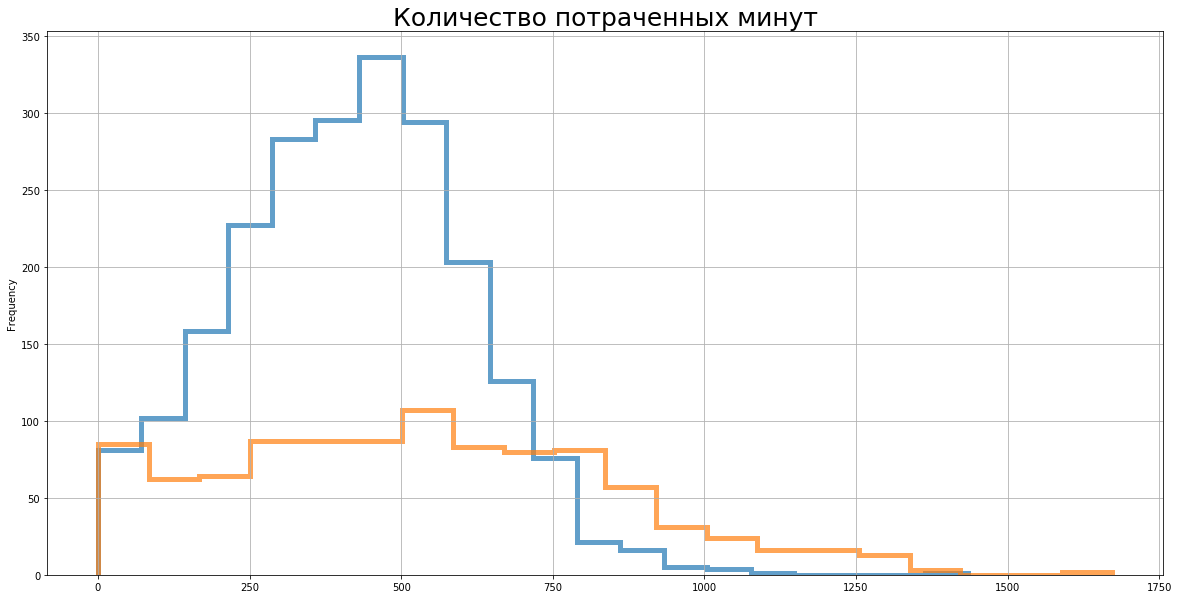

In [60]:
import matplotlib.pyplot as plt

tariff_list = ['smart', 'ultra']

for i in tariff_list:
    (df
        .query('tariff == @i')
        .calls_sum.plot(kind='hist', bins=20, grid=True, alpha=0.7, linewidth=5, histtype='step', figsize=(20, 10))
    )
plt.title('Количество потраченных минут', size=25)
plt.show

Посмотрим, присутствует ли скошенность на гистограммах:

In [61]:
for i in tariff_list:    
    print(df.query('tariff == @i').calls_sum.mean() > df.query('tariff == @i').calls_sum.median())

False
True


Гистограмма тарифа smart имеет отрицательную скошенность, это значит, что большая часть абонентов находится перед медианой. Гистограмма тарифа ultra имеет положительную скошенность, а это значит, что большая часть абонентов находится за медианой. Посчитаем дисперсию, среднее арифметическое и стандартное отклонение для тарифов smart и ultra:

In [62]:
import numpy as np

dispersia = []

for i in tariff_list:
    dispersia.append(np.var(df.query('tariff == @i')['calls_sum'])) 

In [63]:
mean = [df.query('tariff == @i').calls_sum.mean() for i in tariff_list]
mean

[417.9349484073576, 526.6233502538071]

In [64]:
std = [math.sqrt(i) for i in dispersia]
std

[190.27103471651876, 317.44483554974113]

Посмотрим, какому количеству абонентов хватает стандартного пакета минут:

In [65]:
from scipy import stats as st

distr = st.norm(mean[0], std[0])
result = distr.cdf(550)
result

0.7561868336729852

Стандартного количества минут, тарифа smart, хватает только 75% всех абонентов этого тарифа.

In [66]:
distr = st.norm(mean[1], std[1])
result = distr.cdf(1950)
result

0.9999963346777319

Стандартного количества минут, тарифа ultra, хватает 99% абонентов этого тарифа. По правилу трёх сигм рассчитаем, сколько минут абонентам тарифа smart нужно, чтобы их хватило 99% пользователей:

In [67]:
math.ceil(df.query('tariff == "smart"')['calls_sum'].mean() + std[0] * 3)

989

99% абонентам тарифа smart достаточно 989 минут в месяц.

======================================================================================================================

Посмотрим, сколько сообщений требуется пользователям каждого тарифа в месяц. Построим гистограмму. Опишем распределения.

<function matplotlib.pyplot.show(*args, **kw)>

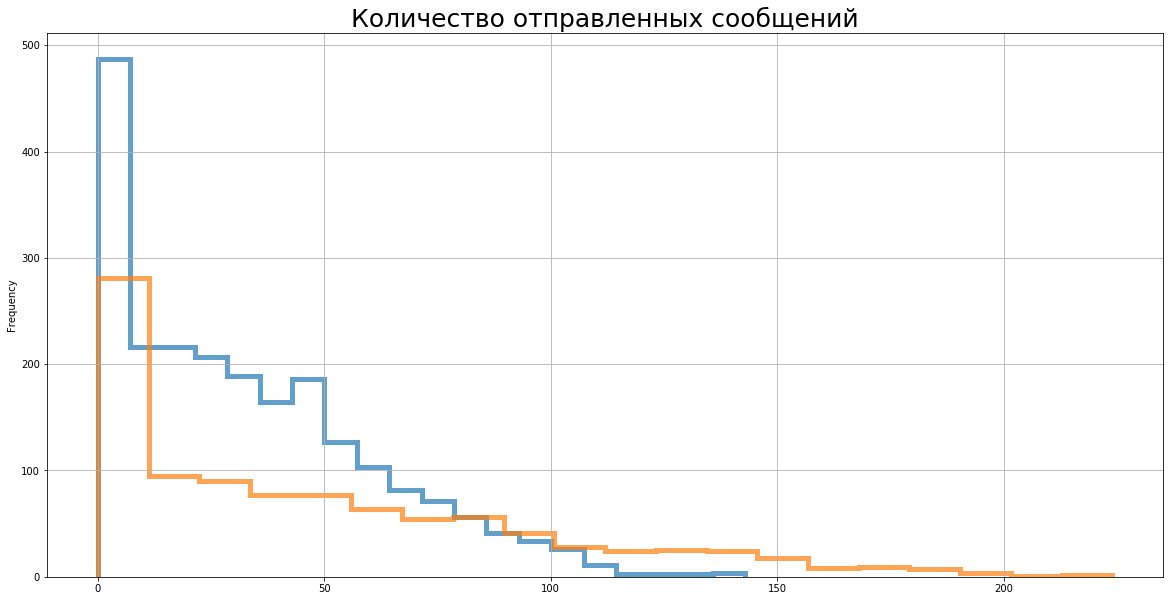

In [68]:
for i in tariff_list:
    (df
        .query('tariff == @i')
        .messages_count.plot(kind='hist', bins=20, grid=True, alpha=0.7, linewidth=5, histtype='step', figsize=(20, 10))
    )
plt.title('Количество отправленных сообщений', size=25)
plt.show

Посмотрим, присутствует ли скошенность на гистограммах:

In [69]:
for i in tariff_list:    
    print(df.query('tariff == @i').messages_count.mean() > df.query('tariff == @i').messages_count.median())

True
True


Гистограмма тарифов smart и ultra имеют положительную скошенность. Посчитаем дисперсию, среднее арифметическое и стандартное отклонение для тарифов smart и ultra:

In [70]:
dispersia = []

for i in tariff_list:
    dispersia.append(np.var(df.query('tariff == @i')['messages_count']))

In [71]:
mean = [df.query('tariff == @i').messages_count.mean() for i in tariff_list]
mean

[33.384028712427096, 49.36345177664975]

In [72]:
std = [math.sqrt(i) for i in dispersia]
std

[28.221542886898934, 47.78018496610161]

Посмотрим, какому количеству абонентов хватает стандартного пакета сообщений:

In [73]:
distr = st.norm(mean[0], std[0])
result = distr.cdf(50)
result

0.721991898264964

Стандартного количества сообщений, тарифа smart, хватает только 72% всех абонентов этого тарифа.

In [74]:
distr = st.norm(mean[1], std[1])
result = distr.cdf(1000)
result

1.0

Стандартного количества сообщений, тарифа ultra, хватает 100% абонентов этого тарифа. По правилу трёх сигм рассчитаем, сколько сообщений, абонентам тарифа smart нужно, чтобы их хватило 99% пользователей:

In [75]:
math.ceil(df.query('tariff == "smart"')['messages_count'].mean() + std[0] * 3)

119

99% абонентам тарифа smart достаточно 119 сообщений в месяц.

======================================================================================================================

Посмотрим какой интернет-трафик требуется пользователям каждого тарифа в месяц. Построим гистограмму. Опишем распределения.

<function matplotlib.pyplot.show(*args, **kw)>

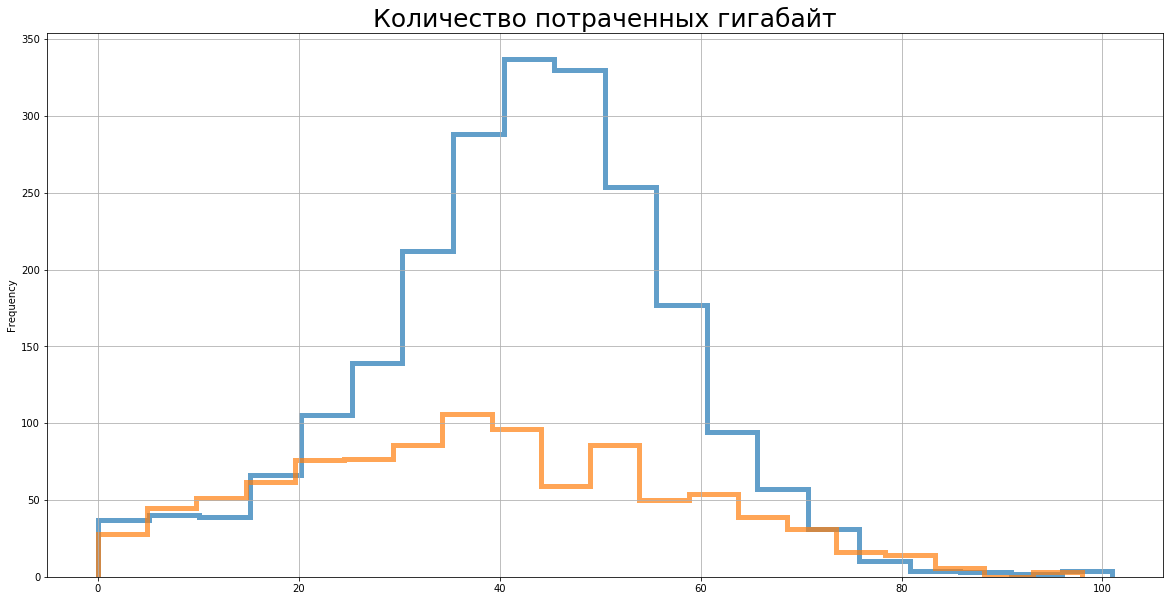

In [76]:
for i in tariff_list:
    (df
        .query('tariff == @i')
        .internet_sum.plot(kind='hist', bins=20, grid=True, alpha=0.7, linewidth=5, histtype='step', figsize=(20, 10))
    )
plt.title('Количество потраченных гигабайт', size=25)
plt.show

Посмотрим, присутствует ли скошенность на гистограммах:

In [77]:
for i in tariff_list:    
    print(df.query('tariff == @i').internet_sum.mean() > df.query('tariff == @i').internet_sum.median())

False
True


Гистограмма тарифа smart имеет отрицательную скошенность, а гистограмма тарифа ultra имеет положительную скошенность. Посчитаем дисперсию, среднее арифметическое и стандартное отклонение для тарифов smart и ultra:

In [78]:
dispersia = []

for i in tariff_list:
    dispersia.append(np.var(df.query('tariff == @i')['internet_sum']))

In [79]:
mean = [df.query('tariff == @i').internet_sum.mean() for i in tariff_list]
mean

[42.4181247196052, 38.16446700507614]

In [80]:
std = [math.sqrt(i) for i in dispersia]
std

[14.939752009747476, 19.55472228905874]

Посмотрим, какому количеству абонентов хватает стандартного пакета интернет-трафика:

In [81]:
distr = st.norm(mean[0], std[0])
result = distr.cdf(15)
result

0.03323460127843717

Стандартного количества интернет-трафика, тарифа smart, хватает только 3% всех абонентов этого тарифа.

In [82]:
distr = st.norm(mean[1], std[1])
result = distr.cdf(30)
result

0.33814943530804775

Стандартного количества интернет-трафика, тарифа ultra, хватает 33% абонентов этого тарифа. По правилу трёх сигм рассчитаем, сколько интернет-трафика, абонентам тарифа smart и ultra нужно, чтобы его хватило 99% пользователей:

In [83]:
sigma_3 = []
sigma_3.append(math.ceil(df.query('tariff == "smart"')['internet_sum'].mean() + std[0] * 3))
sigma_3.append(math.ceil(df.query('tariff == "ultra"')['internet_sum'].mean() + std[1] * 3))

In [84]:
sigma_3

[88, 97]

Абонентам тарифа smart достаточно 88 гигабайт интернет-трафика в месяц, а абонентам тарифа ultra достаточно 97 гигабайт интернет-трафика в месяц.

## Шаг 4. Проверьте гипотезы

Выдвинем две гипотезы: 
* нулевая: средняя выручка пользователей тарифов smart и ultra равны
* альтернативная: средняя выручка пользователей тарифов smart и ultra различается

Для проверки гипотиз будем использовать критерий равенства. Проверим первую (нулевую) гипотезу:

In [85]:
from scipy import stats as st

alpha = 0.05

results = st.ttest_ind(
    df.query('tariff == "smart"').total_price, 
    df.query('tariff == "ultra"').total_price)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 2.4664553703702065e-111
Отвергаем нулевую гипотезу


Нулевая гипотеза не подтвердилась. Значит имеет место альтернативная гипотеза "средняя выручка пользователей тарифов smart и ultra различается" 

======================================================================================================================

Добавим к таблице df столбец city, из таблицы df_users:

In [86]:
df = df.merge(df_users[['user_id', 'city']])

Выдвинем две гипотезы: 
* нулевая: средняя выручка пользователей из Москвы равна выручке пользователей из других регионов
* альтернативная: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Сравним дисперсии столбца total_price, двух совокупностей:

In [87]:
100 - ((np.var(df.query('city == "Москва"')['total_price'])) / np.var(df.query('city != "Москва"')['total_price']) * 100)

17.992237056395666

 Дисперсия абонентов из москвы и дисперсия абонентов из регионов отличается довольно сильно 18%, поэтому добавим в метод st.ttest_ind аргумент equal_var со значением False:

Проверим первую (нулевую) гипотезу для тарифов smart и ultra:

In [88]:
alpha = 0.05
    
results = st.ttest_ind(
    df.query('city == "Москва"').total_price, 
    df.query('city != "Москва"').total_price,  equal_var=False)
    
print('p-значение:', results.pvalue)
    
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу для", i)
else:
    print("Не получилось отвергнуть нулевую гипотезу для", i)

p-значение: 0.25438147756433427
Не получилось отвергнуть нулевую гипотезу для ultra


Нуливая гипотеза подтвердилась: средняя выручка пользователей из Москвы равна выручке пользователей из других регионов.

## Шаг 5. Напишите общий вывод

   Из исследований видно, что 25% абонентов тарифа Смарт минут в тарифе не хватает, а абоненты тарифа Ультра не расходуют предоставленные 3000 минут), следовательно для этих 25% абонентов тарифа Смарт следует рекомендовать перейти на тариф Ультра или разработать новый тариф с пакетом в 1000 минут для абонентов тарифов Ультра и Смарт.
   В отношении сообщений в тарифах очень большой разрыв по количеству предоставленных сообщений, в тарифе Смарт предоставленные 50 сообщений хватает абонентам обоих тарифов, это указывает на возможность пересмотреть количество предоставляемых сообщений (оптимизация тарифа) в тарифе Ультра.
   В отношении трафика интернета - в обоих тарифах абонентам катострофически не хватает интернет-трафика, это указывает также на оптимизацию тарифов или создание нового тарифа с количеством трафика 100 Ггб.
    
   Вывод: я считаю, что из уже действующих тарифов Ультра лучше, чем Смарт, потому-что абоненты обоих тарифов тратят примерно одно и тоже количество интернет-трафика, в тарифе Ультра трафик больше, чем в Смарте и стоимость предоставления дополнительного трафика дешевле, чем в тарифе Смарт.